<a href="https://colab.research.google.com/github/AyushK-101/WorkSamples/blob/main/Mobile%20Price%20Prediction/mobileprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/MobileDataset.csv")

In [ ]:
df.shape


(836, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [ ]:
df.isna().sum()

Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [ ]:
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mean())
df['RAM']=df['RAM'].fillna(df['RAM'].mean())
df['ROM']=df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size']=df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam']=df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())


In [ ]:
df.isna().sum()

Unnamed: 0       0
Brand me         0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [ ]:
df.drop('Brand me',axis=1,inplace=True)
df.columns

Index(['Unnamed: 0', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [ ]:
df.RAM = df.RAM.astype('int64')
df.ROM = df.ROM.astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Ratings        836 non-null    float64
 2   RAM            836 non-null    int64  
 3   ROM            836 non-null    int64  
 4   Mobile_Size    836 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      836 non-null    int64  
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.9 KB


In [ ]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.00000
mean,417.500000,4.103106,6.065789,64.370813,5.597282,47.983254,9.532297,3274.688995,18220.34689
std,241.476707,0.358510,2.519714,53.320217,3.893993,11.170093,5.367247,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.75000
50%,417.500000,4.101553,6.000000,45.500000,4.770000,48.000000,9.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


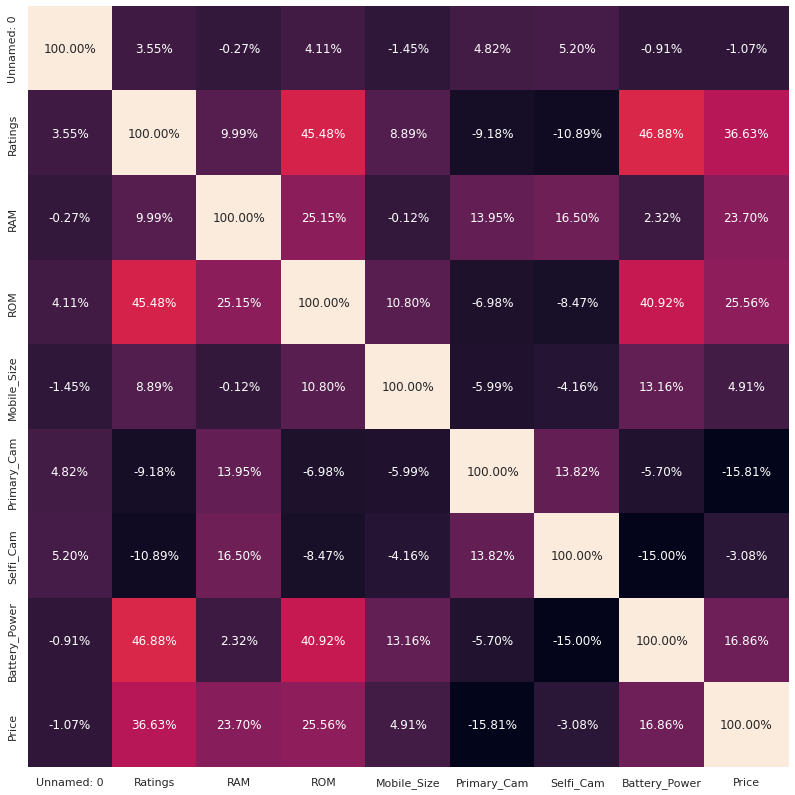

In [ ]:
corr=df.corr()
sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=False,square=True,fmt=".2%",annot=True)

In [ ]:
df.head()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,4.3,4,128,6.00,48,13,4000,24999
1,1,3.4,6,64,4.50,48,12,4000,15999
2,2,4.3,4,4,4.50,64,16,4000,15000
3,3,4.4,6,64,6.40,48,15,3800,18999
4,4,4.5,6,128,6.18,35,15,3800,18999


In [ ]:
x=df.iloc[:,2:8].values# last value ko exclude kardeti h,8 h to 7 tak lega
y=df.iloc[:,-1].values

In [ ]:
x.shape

(836, 6)

In [ ]:
y.shape

(836,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(668, 6) (168, 6) (668,) (168,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor(n_estimators=15,random_state=0)
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain)

0.958333539182329

In [ ]:
rfc.score(xtest,ytest)

0.9502535246636988

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.9746413005435787
0.9661461992501748


**Test Accuracy : 96%**

In [ ]:
import pickle
pickle.dump(dtr,open('model.pkl','wb'))

In [ ]:
df.head()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,4.3,4,128,6.00,48,13,4000,24999
1,1,3.4,6,64,4.50,48,12,4000,15999
2,2,4.3,4,4,4.50,64,16,4000,15000
3,3,4.4,6,64,6.40,48,15,3800,18999
4,4,4.5,6,128,6.18,35,15,3800,18999


In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
final = np.array([8,64,6.5,64,16,5000])
prediciton = model.predict(final.reshape(1,-1))
prediciton[0]

39999.0